In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
mpl.rcParams['pdf.fonttype'] = 42 # allegedly allows text to be saved as editable

mpl.rcParams['font.sans-serif'] = ['Arial Narrow']
mpl.rcParams['font.size'] = 9
mpl.rcParams['text.usetex'] = False
mpl.rcParams['svg.fonttype'] = 'none'

import warnings
warnings.filterwarnings("ignore")

plt.style.use(['ggplot'])
# prints list of available seaborn styles
#print(plt.style.available)

from scipy.stats import norm

print('ready')

ready


In [2]:
df=pd.read_csv('ElginUOF.csv')
df['yearQuarter'] = df['year'].astype(str) + ', ' + df['quarter']
df.head(3)

,year,quarter,Total Calls for Service (CFS),Total Arrests,Total Response to Resistance (RTR) Incidents,Show of force Only,Use of force Only,Total Transitions (show to use of force),"Total show, use and transitions","Number Times Handgun Drawn, But Not Pointed",...,Officer minor injuries,Officer major injuries,Total officer injuries,Total officer incidents,Suspect no injuries,Suspect minor injuries,Suspect major injuries,Total suspect injuries,Total suspect incidents,yearQuarter
0,2014,1st,19217,989,32,12,18,2,32,3,...,7,0,7,32,27,5,0,5,32,"2014, 1st"
1,2014,2nd,21265,1178,25,7,15,3,25,1,...,6,0,6,25,18,7,0,7,25,"2014, 2nd"
2,2014,3rd,21994,1246,36,11,20,5,36,5,...,8,1,9,36,25,11,0,11,36,"2014, 3rd"


In [3]:
df.dtypes

year                                             int64
quarter                                         object
Total Calls for Service (CFS)                    int64
Total Arrests                                    int64
Total Response to Resistance (RTR) Incidents     int64
Show of force Only                               int64
Use of force Only                                int64
Total Transitions (show to use of force)         int64
Total show, use and transitions                  int64
Number Times Handgun Drawn, But Not Pointed      int64
Number Times Handgun Pointed                     int64
Number Times Handgun Discharged                  int64
Total handguns incidents                         int64
Number Times TASER Drawn, But Not Pointed        int64
Number Times TASER Pointed                       int64
Number Times TASER Fired                         int64
Total Taser incidents                            int64
Officer no injuries                              int64
Officer mi

In [3]:
# if desired, reworks use of force stats

df1 = df[['year','quarter','yearQuarter','Show of force Only']]
df1['type'] = 'SOF'
df1.rename(columns = {'Show of force Only':'Incidents'}, inplace = True)
df2 = df[['year','quarter','yearQuarter','Use of force Only']]
df2['type'] = 'UOF'
df2.rename(columns = {'Use of force Only':'Incidents'}, inplace = True)
df3 = df[['year','quarter','yearQuarter','Total Transitions (show to use of force)']]
df3['type'] = 'Transitions'
df3.rename(columns = {'Total Transitions (show to use of force)':'Incidents'}, inplace = True)
dfAll = pd.concat([df1,df2,df3])
print(dfAll.dtypes)
dfAll.head(4)

year            int64
quarter        object
yearQuarter    object
Incidents       int64
type           object
dtype: object


,year,quarter,yearQuarter,Incidents,type
0,2014,1st,"2014, 1st",12,SOF
1,2014,2nd,"2014, 2nd",7,SOF
2,2014,3rd,"2014, 3rd",11,SOF
3,2014,4th,"2014, 4th",6,SOF


In [5]:
dfAll.shape

(36, 5)

In [6]:
dfAll.sort('Incidents')

,year,quarter,yearQuarter,Incidents,type
0,2014,1st,"2014, 1st",2,Transitions
5,2015,2nd,"2015, 2nd",2,Transitions
1,2014,2nd,"2014, 2nd",3,Transitions
3,2014,4th,"2014, 4th",3,Transitions
2,2014,3rd,"2014, 3rd",5,Transitions
3,2014,4th,"2014, 4th",6,SOF
8,2016,1st,"2016, 1st",6,Transitions
10,2016,3rd,"2016, 3rd",7,Transitions
1,2014,2nd,"2014, 2nd",7,SOF
6,2015,3rd,"2015, 3rd",7,Transitions


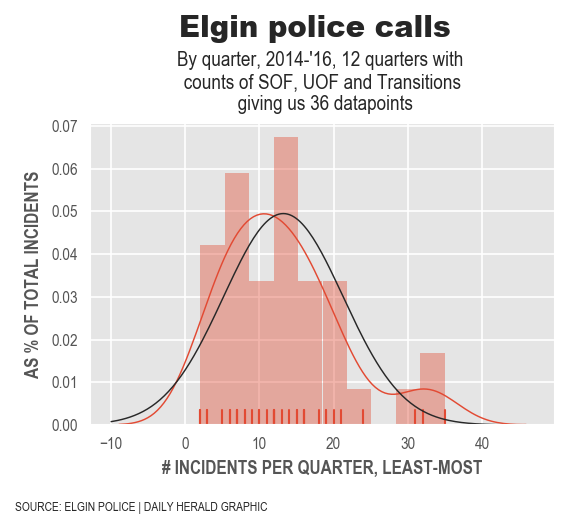

In [4]:
# Now lets look at the distribution of incidents
# https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot
paper_rc = {'lines.linewidth': .7}                  
sns.set_context("paper", rc = paper_rc)

my_dpi=150

f, ax = plt.subplots(figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)

# fit gives us normal curve, kde =  kernel density estimate
ax = sns.distplot(dfAll['Incidents'], hist=True, bins=10, fit=norm, kde=True, rug=True)#, norm_hist=True)

f.suptitle('Elgin police calls', fontsize=14, family='Arial Black', y=1.15)
ax.set_title('By quarter, 2014-\'16, 12 quarters with \n counts of SOF, UOF and Transitions \n giving us 36 datapoints', fontsize=10)#, loc='left')
ax.set_ylabel('AS % OF TOTAL INCIDENTS', fontsize=9, fontweight='bold')
ax.set_xlabel('# INCIDENTS PER QUARTER, LEAST-MOST', fontsize=9, fontweight='bold')
#ax.set_xticklabels(dfAll['quarter'])


f.text(0,0-.09, 'SOURCE: ELGIN POLICE | DAILY HERALD GRAPHIC', fontsize=6)

f.savefig('pdfs_images/histogram.pdf')


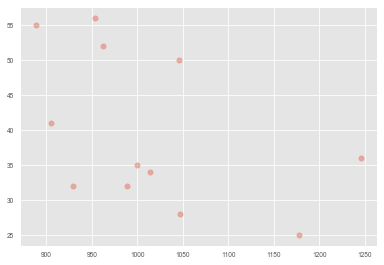

In [10]:
# correlation between total arrests and RTR?
g  = plt.scatter(\
            x=df['Total Arrests'], 
            y=df['Total Response to Resistance (RTR) Incidents'], 
            #s=df['Total Calls for Service (CFS)']/10, # s is size
            alpha=0.4)             # alpha means opacity. so you can see the overlapping dots.


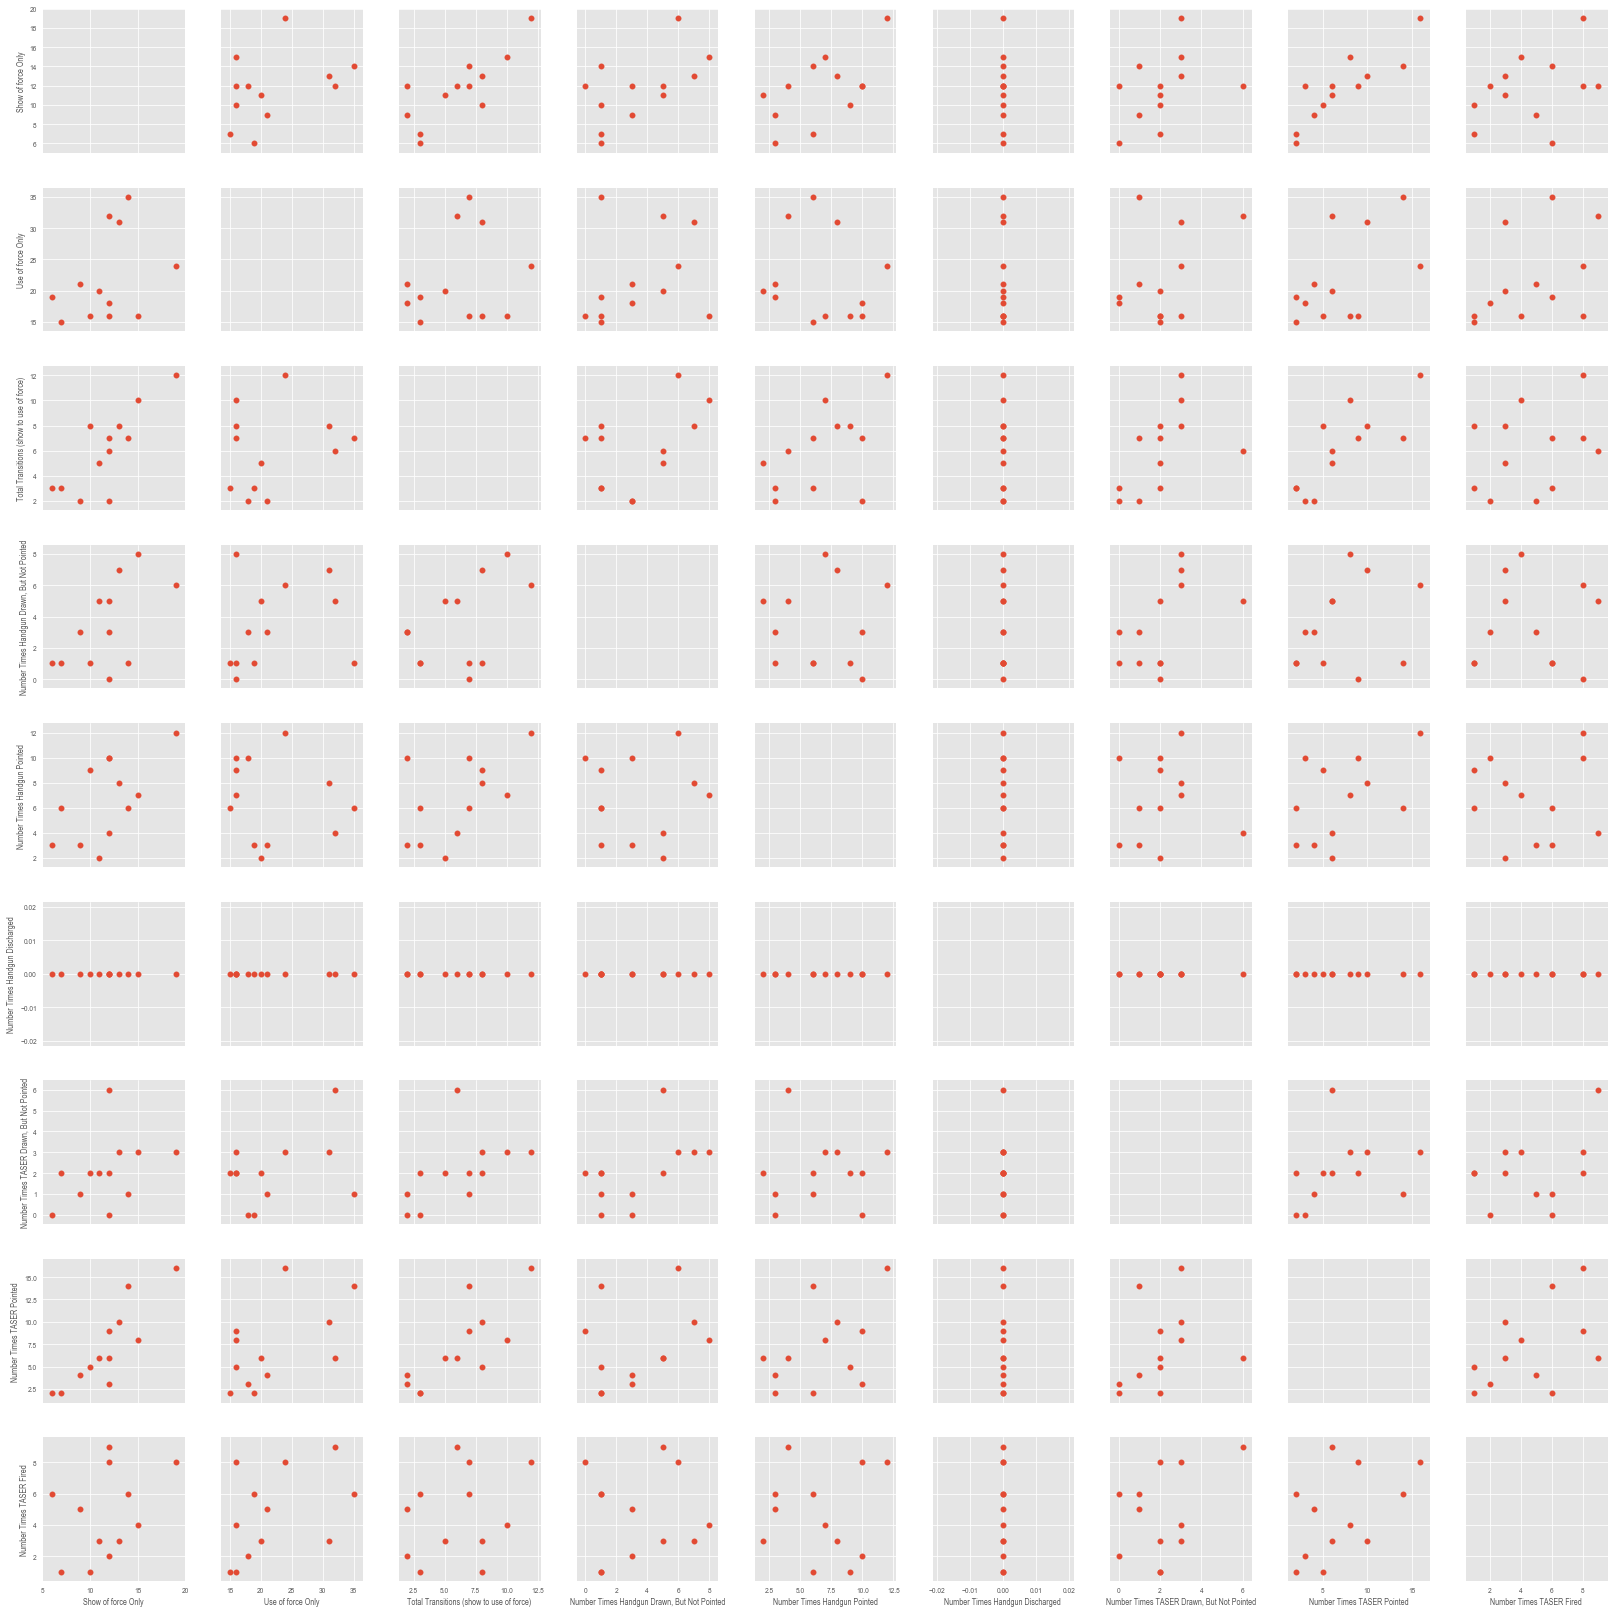

In [9]:
# let's see what correlations we can find

grid_columns = ['Show of force Only', 'Use of force Only', 'Total Transitions (show to use of force)', 'Number Times Handgun Drawn, But Not Pointed', 'Number Times Handgun Pointed', 'Number Times Handgun Discharged', 'Number Times TASER Drawn, But Not Pointed', 'Number Times TASER Pointed', 'Number Times TASER Fired']
g = sns.PairGrid(df[grid_columns])
#g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);


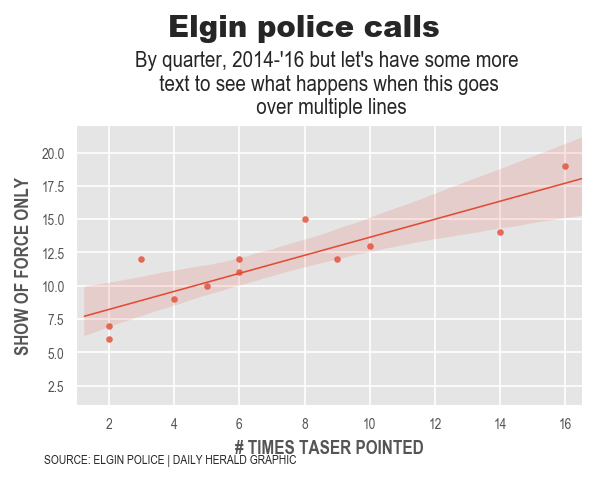

In [22]:
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
mpl.rcParams['lines.linewidth'] = 0.5

mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 150


g = sns.lmplot(data=df, x='Number Times TASER Pointed', y='Show of force Only',
               fit_reg=False,
               #legend=True,
               #legend_out=False, # if a legend, sets it inside box
               scatter_kws={"s": 10},
               size=2.5, aspect=1.6 # Adjusts size of figure - make sure consistent (10=10)
              )
sns.regplot(x="Number Times TASER Pointed", y="Show of force Only", data=df, scatter=False, ax=g.axes[0, 0])

plt.ylim(1, 22) # set size based on data
plt.xlim(1, 16.5)

plt.suptitle('Elgin police calls', fontsize=14, family='Arial Black', y=1.24)
plt.title('By quarter, 2014-\'16 but let\'s have some more \n text to see what happens when this goes \n over multiple lines', fontsize=11)#, loc='left')
plt.ylabel('SHOW OF FORCE ONLY', fontsize=9, fontweight='bold')
plt.xlabel('# TIMES TASER POINTED', fontsize=9, fontweight='bold')
plt.text(0,0-3.3, 'SOURCE: ELGIN POLICE | DAILY HERALD GRAPHIC', fontsize=6)

g.savefig('pdfs_images/scatter.pdf')

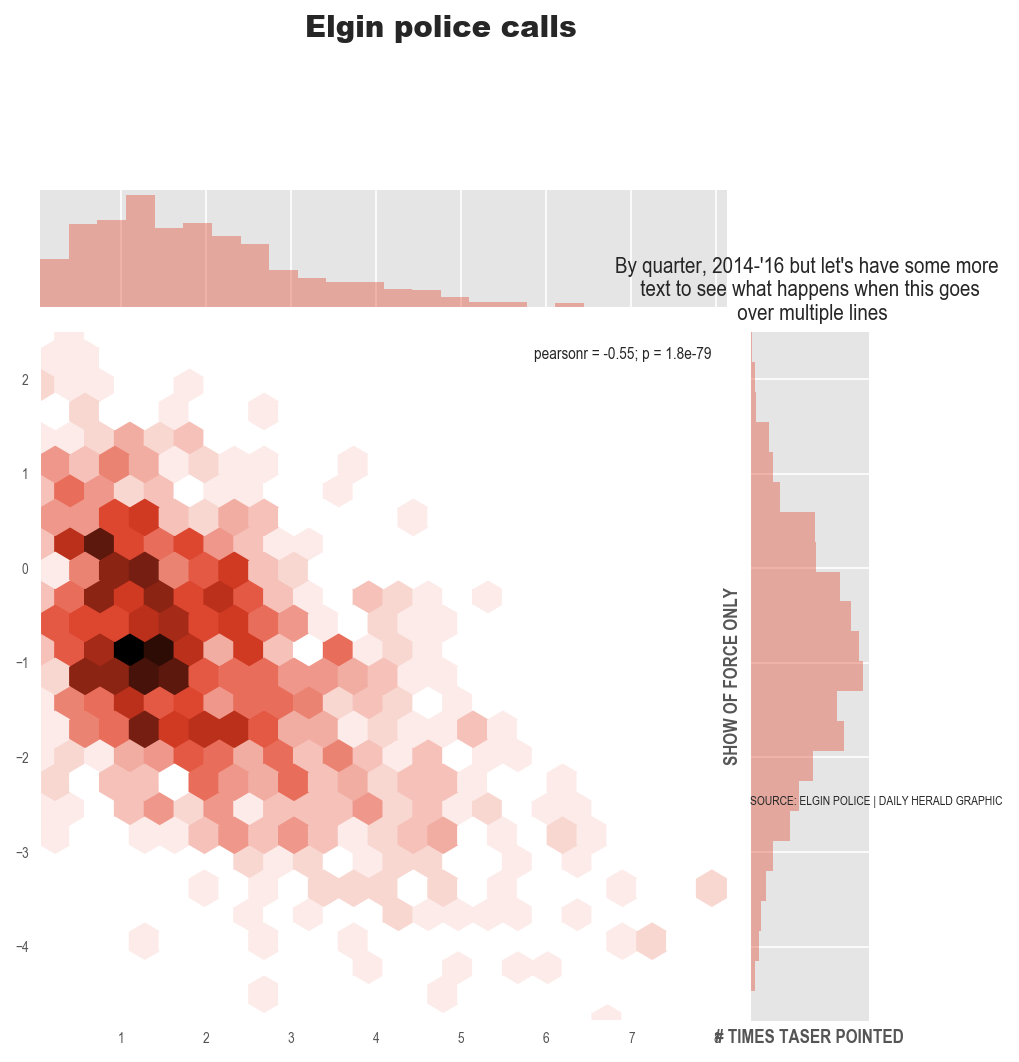

In [16]:
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 150


#from scipy.stats import kendalltau
rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)
#x=df['Number Times TASER Pointed']
#y=df['Show of force Only']
sns.jointplot(x, y, kind="hex")#, stat_func=kendalltau, color="#4CB391")

plt.suptitle('Elgin police calls', fontsize=14, family='Arial Black', y=1.17)
plt.title('By quarter, 2014-\'16 but let\'s have some more \n text to see what happens when this goes \n over multiple lines', fontsize=11)#, loc='left')
plt.ylabel('SHOW OF FORCE ONLY', fontsize=9, fontweight='bold')
plt.xlabel('# TIMES TASER POINTED', fontsize=9, fontweight='bold')
plt.text(0,0-2.5, 'SOURCE: ELGIN POLICE | DAILY HERALD GRAPHIC', fontsize=6)
